In [69]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

**PARTIE 1** - Définition des fonctions

Fonction d'initialisation

In [70]:
def initialisation(X):
    W = np.random.random((X.shape[1],1))
    b = np.random.random(1)
    return W, b

Fonction de notre modèle, A est la fonction d'activation
Ici, on utilise une fonction logistique

In [71]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

Fonction coût

In [72]:
def log_loss(A,y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1-y) * np.log(1-A+epsilon))

Fonction des gradients

In [73]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW, db

Fonction de maj

In [74]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

Fonction de prédiction

In [75]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >=0.5

On code notre premier neurone

In [76]:
def artificial_neuron(X,y,learning_rate=0.1,n_iter=100):
    #initialiser les params W,B
    W, b = initialisation(X)

    Loss = []
    acc = []

    for i in tqdm(range(n_iter)):
        #activation
        A = model(X, W, b)

        if i % 10 == 0:
            #calcul de la performance
            y_pred = predict(X,W,b)
            acc.append(accuracy_score(y, y_pred))
            #calcul du cout
            Loss.append(log_loss(A,y))

        #mise a jour avec descente de gradient
        dW, db = gradients(A,X,y)
        W, b = update(dW, db, W, b, learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Loss)
    plt.subplot(1,2,2)
    plt.plot(acc)
    plt.show()

    return W, b


**PARTIE 2** - Iris

In [77]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))

100%|██████████| 100/100 [00:00<00:00, 14288.70it/s]


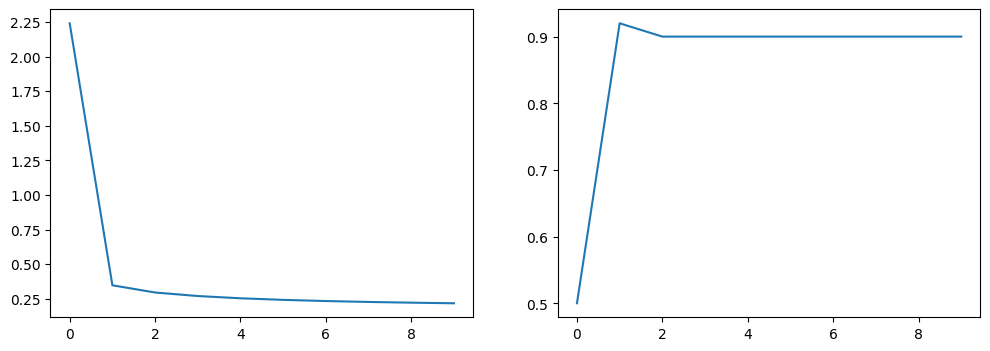

In [78]:
W, b = artificial_neuron(X, y)

On va tester avec de nouvelles plantes

In [79]:
new_plant = np.array([2,1])
predict(new_plant,W,b) #On s'attend a avoir True (c'est une plante toxique)

array([ True])

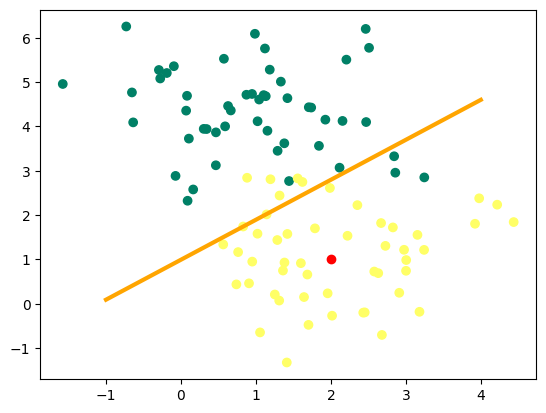

In [80]:
x0 = np.linspace(-1,4,100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:,1],c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1],c="r")
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

**PARTIE 3** - Cat or Dog

In [81]:
train_dataset = h5py.File('data_assets/trainset.hdf5', "r")
X_train = np.array(train_dataset["X_train"][:]) # your train set features
y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

test_dataset = h5py.File('data_assets/testset.hdf5', "r")
X_test = np.array(test_dataset["X_test"][:]) # your train set features
y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

In [82]:
X_train_reshape_norm = X_train.reshape(X_train.shape[0],-1)/ X_train.max()
X_test_reshape_norm = X_test.reshape(X_test.shape[0],-1)/ X_train.max()

100%|██████████| 10000/10000 [00:33<00:00, 300.70it/s]


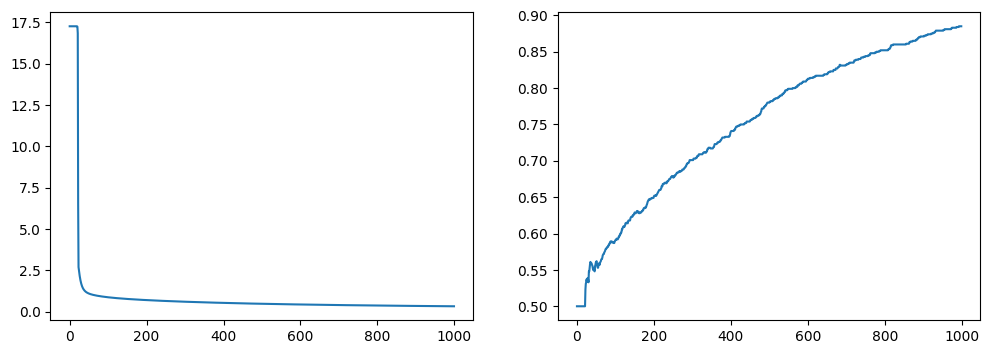

In [84]:
W, b = artificial_neuron(X_train_reshape_norm, y_train, learning_rate=0.01, n_iter=10000)

In [85]:
def artificial_neuron_2(X_train,y_train,X_test,y_test,learning_rate=0.1,n_iter=100):
    #initialiser les params W,B
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    #BOUCLE APPRENTISSAGE
    for i in tqdm(range(n_iter)):
        #activation
        A = model(X_train, W, b)

        if i % 10 == 0:
            #calcul de la performance
            y_pred = predict(X_train,W,b)
            train_acc.append(accuracy_score(y_train, y_pred))
            #calcul du cout
            train_loss.append(log_loss(A,y_train))

            #calcul de la performance
            A_test = model(X_test, W, b)
            y_pred = predict(X_test,W,b)
            test_acc.append(accuracy_score(y_test, y_pred))
            #calcul du cout
            test_loss.append(log_loss(A_test,y_test))

        #mise a jour avec descente de gradient
        dW, db = gradients(A,X_train,y_train)
        W, b = update(dW, db, W, b, learning_rate)

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label="train loss")
    plt.plot(test_loss, label="test loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc, label="train acc")
    plt.plot(test_acc, label=" test acc")
    plt.legend()
    plt.show()

    return W, b


100%|██████████| 10000/10000 [00:34<00:00, 291.89it/s]


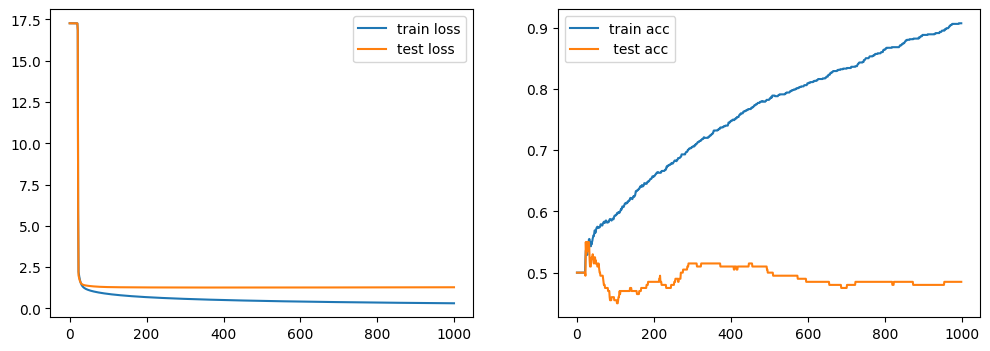

In [86]:
W, b = artificial_neuron_2(X_train_reshape_norm, y_train, X_test_reshape_norm, y_test, learning_rate=0.01, n_iter=10000)